In [2]:
# Se importan las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound

# Definición de constantes usadas
h = 6.626 * (10**(-34))
c = 3 * (10**(8))
pi = np.pi
k = 1.38 * (10**(-23))

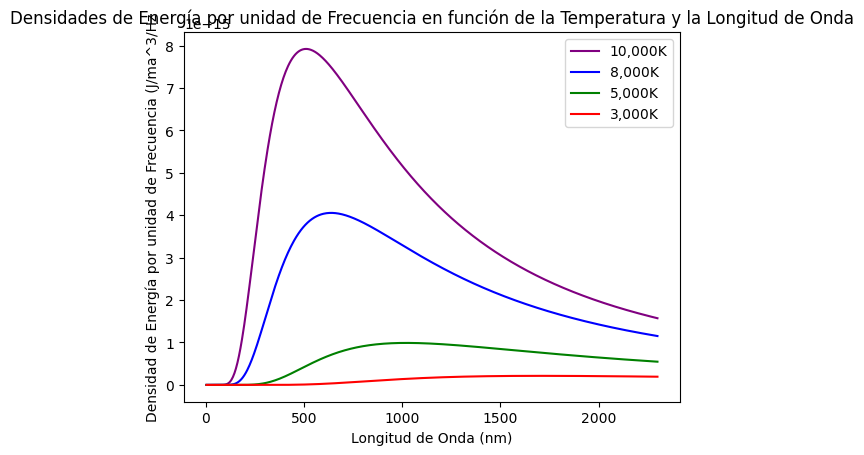

In [4]:
# Función de la densidad de energía por unidad de frecuencia con entradas de longitud de onda y temperatura
def den_fen (lamb: float, T:float):
    lam = lamb/(10**9)
    a = ((8*pi*h)/(lam**(3)))
    e = np.exp((h*c)/(lam*k*T))
    u = a * (1/(e-1))
    return u

# Se crea un linspace para los posibles valores de lambda y graficar más adelante
lambs = np.linspace(0, 2300, 600)

# Calculo las densidades por unidad de frecuencia usando el linspace y la temperatura fija
densidad_10000K = den_fen(lambs, 10000)
densidad_8000K = den_fen(lambs, 8000)
densidad_5000K = den_fen(lambs, 5000)
densidad_3000K = den_fen(lambs, 3000)

# Se hacen las graficas correspondientes
plt.plot(lambs, den_fen(lambs, 10000), label = "10,000K", color = "purple")
plt.plot(lambs, den_fen(lambs, 8000), label = "8,000K", color = "blue")
plt.plot(lambs, den_fen(lambs, 5000), label = "5,000K", color = "green")
plt.plot(lambs, den_fen(lambs, 3000), label = "3,000K", color = "red")
plt.xlabel('Longitud de Onda (nm)')  # Etiqueta del eje x
plt.ylabel('Densidad de Energía por unidad de Frecuencia (J/ma^3/Hz')  # Etiqueta del eje y
plt.title('Densidades de Energía por unidad de Frecuencia en función de la Temperatura y la Longitud de Onda')  # Título del gráfico
plt.legend()
plt.show()

In [5]:
#Funciones auxiliares que invocan el cálculo de u para las temepraturas pedidas, serán utiles más adelante
def objective_function10(lamb):
    return -den_fen(lamb, 10000)
def objective_function8(lamb):
    return -den_fen(lamb, 8000)
def objective_function5(lamb):
    return -den_fen(lamb, 5000)
def objective_function3(lamb):
    return -den_fen(lamb, 3000)

# Encontrar el valor de entrada que maximiza la densidad de energía a 10,000K
max_10p = fminbound(objective_function10, 0, 2300)
max_8p = fminbound(objective_function8, 0, 2300)
max_5p = fminbound(objective_function5, 0, 2300)
max_3p = fminbound(objective_function3, 0, 2300)

#Se convierten a string y se redondean los valores de lambda que maximizan u
max_10 = str(round(max_10p,2))
max_8 = str(round(max_8p,2))
max_5 = str(round(max_5p,2))
max_3= str(round(max_3p,2))

#Se imprimen los valores de lamba que maximizan u
print ("La longitud de onda que maximiza la densidad de energía a 10,000 K: " + max_10 + " nm")
print ("La longitud de onda que maximiza la densidad de energía a 8,000 K: " + max_8 + " nm")
print ("La longitud de onda que maximiza la densidad de energía 5,000 K: " + max_5 + " nm")
print ("La longitud de onda que maximiza la densidad de energía 3,000 K: " + max_3 + " nm")

La longitud de onda que maximiza la densidad de energía a 10,000 K: 510.53 nm
La longitud de onda que maximiza la densidad de energía a 8,000 K: 638.16 nm
La longitud de onda que maximiza la densidad de energía 5,000 K: 1021.06 nm
La longitud de onda que maximiza la densidad de energía 3,000 K: 1701.77 nm


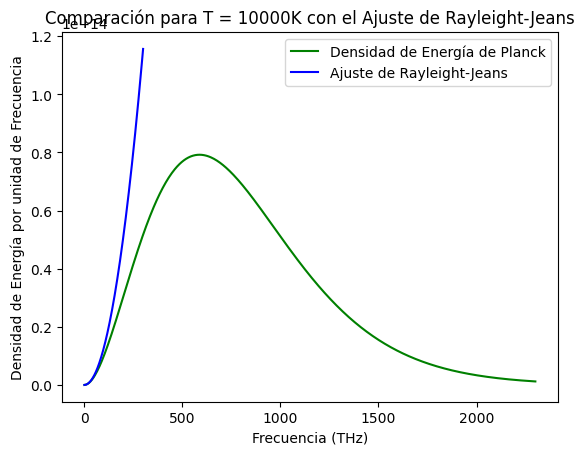

In [6]:
#Nuevamente se hace la función de densidad de energía por unidad de frecuencia ahora en términos de la frecuencia
def den_fen2(frecp:float):
    frec = frecp*(10**12)
    a = (8*pi*(frec**2))/(c**3)
    b = (h*frec)
    d = np.exp((h*frec)/(k*10000))
    u = a * (b/(d-1))
    return u

#Función del ajuste de Rayleight-Jeans
def ajuste_ray (frecp: float):
    frec = frecp * (10**12)
    a = 8*pi*(frec**2)*k*10000 
    b = c**3
    u = a/b
    return u

#Se crean dos linspace para la frecuencia, el segundo se usará para el ajuste de R-J, tomando hasta 300 en lugar de 2300 porque ese ajuste diverge rapidamente
frecs = np.linspace (1, 2300, 600)
frecs2 = np.linspace(1, 300, 600)

#Se grafica simultaneamente la función de u de Planck (que concuerda con los datos) y la de Rayleight-Jeans
plt.plot(frecs, den_fen2(frecs), label = "Densidad de Energía de Planck", color = "green")
plt.plot(frecs2, ajuste_ray(frecs2), label = "Ajuste de Rayleight-Jeans", color = "blue")
plt.xlabel('Frecuencia (THz)')  # Etiqueta del eje x
plt.ylabel('Densidad de Energía por unidad de Frecuencia')  # Etiqueta del eje y
plt.title("Comparación para T = 10000K con el Ajuste de Rayleight-Jeans")  # Título del gráfico
plt.legend()
plt.show()

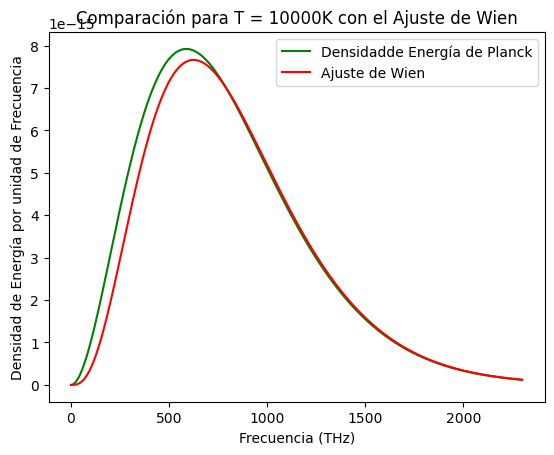

In [7]:
#Función del ajuste de Wien
def ajuste_wien(frecp):
    frec = frecp * 1e12  # Convertir de THz a Hz
    a = frec**3
    i = (h * frec) / (k * 10000)
    e = np.exp(-i)
    u = (10**-57.2)*a * e
    return u

#Se grafican simultaneamente la función de u de Planck (que concuerda con los datos) y la de Wien
plt.plot(frecs, den_fen2(frecs), label = "Densidadde Energía de Planck", color = "green")
plt.plot(frecs, ajuste_wien(frecs), label = "Ajuste de Wien", color = "red")
plt.xlabel('Frecuencia (THz)')  # Etiqueta del eje x
plt.ylabel('Densidad de Energía por unidad de Frecuencia')  # Etiqueta del eje y
plt.title("Comparación para T = 10000K con el Ajuste de Wien")  # Título del gráfico
plt.legend()
plt.show()

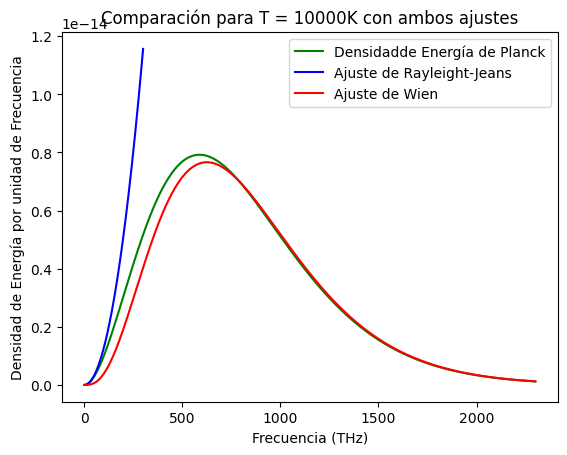

In [8]:
#S grafican todos los ajustes simutaneamente
plt.plot(frecs, den_fen2(frecs), label = "Densidadde Energía de Planck", color = "green")
plt.plot(frecs2, ajuste_ray(frecs2), label = "Ajuste de Rayleight-Jeans", color = "blue")
plt.plot(frecs, ajuste_wien(frecs), label = "Ajuste de Wien", color = "red")
plt.xlabel('Frecuencia (THz)')  # Etiqueta del eje x
plt.ylabel('Densidad de Energía por unidad de Frecuencia')  # Etiqueta del eje y
plt.title("Comparación para T = 10000K con ambos ajustes")  # Título del gráfico
plt.legend()
plt.show()